# 推文概况

In [159]:
import pandas as pd
import numpy as np
import re

tweet = pd.read_csv(r'/Users/kejinglin/Desktop/personal/mydata/tweet_clean.csv',encoding='utf-8')
tweet.head(5)

,u_nickname,u_url,m_content,m_content_url,m_content_id,m_images,m_videos,r_comment_num,g_publish_time,r_like_num,r_trans_num,verified,u_id,u_desc,u_fans,u_follow,u_login_time,u_area
0,Senator John Cornyn,https://twitter.com/JohnCornyn,"""A University of Southampton study suggests th...",nan,1247121007749607429,NaN,NaN,231,2020-04-06 19:18:47,509,218,1,13218102.000,"Mainly news I find interesting, pics, and opin...",294161,11996,2008-02-08 03:52:55,"Austin, Texas"
1,Paul Joseph Watson,https://twitter.com/PrisonPlanet,"""A study published in March indicated that if ...",nan,1240429794057236483,NaN,NaN,224,2020-03-19 08:08:03,11594,3385,1,18643437.000,"""Watson is a brilliant polemicist."" The Specta...",1108941,770,2009-01-06 04:04:23,London
2,Brian Stelter,https://twitter.com/brianstelter,"""America has had the best response to coronavi...",nan,1239359123587846144,NaN,NaN,938,2020-03-16 09:13:35,1455,184,1,14515799.000,Anchor of @ReliableSources and @CNN's chief me...,781737,7075,2008-04-25 02:41:42,New York City
3,Laurie Garrett,https://twitter.com/Laurie_Garrett,"""As many as 14% of recovered #coronavirus pati...",nan,1243328270059405312,NaN,NaN,127,2020-03-27 08:05:34,970,829,1,299273962.000,Former Sr Fellow @CFR_org. Recipient of Pulitz...,237918,1818,2011-05-16 04:00:40,"New York, NY"
4,Tom Fitton,https://twitter.com/TomFitton,"""BIG GUY"" Biden implicated in RICO-style deal ...",nan,1319789796185772033,['http://pbs.twimg.com/media/ElDVv-aWkAAE1d3.j...,NaN,435,2020-10-24 07:56:22,3789,1580,1,18266688.000,"President, Judicial Watch. (These are my perso...",1184751,3225,2008-12-20 22:32:44,"Washington, DC"


In [160]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
tweet.describe()

,m_content_url,m_content_id,r_comment_num,r_like_num,r_trans_num,verified,u_id,u_fans,u_follow
count,0.000,3363.000,3363.000,3363.000,3363.000,3363.000,3363.000,3363.000,3363.000
mean,nan,1269395273794064896.000,916.981,9224.083,2668.979,0.765,114681631490329344.000,1525094.687,7160.960
std,nan,40790737958582656.000,3194.184,26374.268,6245.520,0.424,316559139229294784.000,4596752.512,27356.610
min,nan,268147222116454400.000,101.000,135.000,103.000,0.000,12.000,34.000,0.000
25%,nan,1242509682337593344.000,157.000,1461.000,500.000,1.000,34187871.000,121585.000,536.000
50%,nan,1254447738458189824.000,271.000,3038.000,1124.000,1.000,197854852.000,370085.000,1304.000
75%,nan,1294666363571738624.000,572.000,7159.000,2365.500,1.000,1379174563.000,1184751.000,2717.000
max,nan,1360643960541220864.000,84781.000,396364.000,101008.000,1.000,1211790000000000000.000,129352049.000,594833.000


In [161]:
tweet_unique=tweet.drop_duplicates(subset='u_id', keep='first', inplace=False)

In [162]:
tweet_unique.describe()

,m_content_url,m_content_id,r_comment_num,r_like_num,r_trans_num,verified,u_id,u_fans,u_follow
count,0.000,1410.000,1410.000,1410.000,1410.000,1410.000,1410.000,1410.000,1410.000
mean,nan,1269061693426977024.000,871.475,10933.608,3143.406,0.644,163741927493926752.000,900176.926,6964.896
std,nan,46917105881673560.000,3582.218,32395.461,7833.494,0.479,365517679114804800.000,4499492.576,27908.483
min,nan,268147222116454400.000,101.000,135.000,104.000,0.000,12.000,34.000,0.000
25%,nan,1241276227909996544.000,150.000,1436.500,462.250,0.000,41827883.000,31839.000,523.250
50%,nan,1253471070251839488.000,256.000,3237.000,1157.500,1.000,281313998.000,130246.000,1316.000
75%,nan,1297524134663090176.000,530.750,7496.750,2578.000,1.000,2547239262.500,503994.500,3537.500
max,nan,1360202417673965568.000,84781.000,377475.000,96631.000,1.000,1211790000000000000.000,129352049.000,594833.000


In [163]:
tweet_unique.to_excel('/Users/kejinglin/Desktop/personal/mydata/tweet_unique.xls')
tweet_unique.to_csv('/Users/kejinglin/Desktop/personal/mydata/tweet_unique.csv')

# 日期统计

In [145]:
import datetime
tweet['g_publish_time'] = pd.to_datetime(tweet['g_publish_time']).dt.strftime('%Y-%m')
tweet['g_publish_time']

0       2020-04
1       2020-03
2       2020-03
3       2020-03
4       2020-10
         ...   
3349    2020-04
3350    2020-01
3351    2020-01
3352    2020-04
3353    2020-04
Name: g_publish_time, Length: 3354, dtype: object

In [146]:
tweet.rename(columns={'g_publish_time':'date'}, inplace = True)

<AxesSubplot:xlabel='date'>

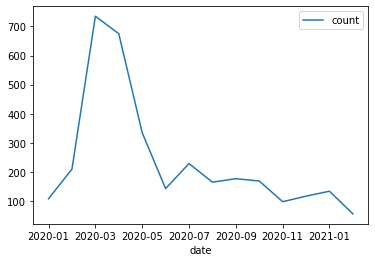

In [147]:
# import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
plt.rcParams['font.sans-serif'] = 'Songti SC'
plt.rcParams['axes.unicode_minus'] = False


# 以日期为分组，对发文量计数
time_tweet = tweet[['date', 'm_content_id']].groupby('date').count()
time_tweet.columns = ['count']
time_tweet=time_tweet[time_tweet['count']>1]
time_tweet.plot()

# 地理纬度

In [ ]:
import pandas as pd
import numpy as np
import re

tweet = pd.read_csv(r'/Users/kejinglin/Desktop/personal/mydata/tweet_unique.csv',encoding='latin-1')
tweet.head(5)

In [ ]:
!pip3 install geotext

In [ ]:
geo=[]
for i in tweet['u_area']:
    place=GeoText(str(i))
    if (len(place.countries) == 0):
        geo.extend(place.cities)
    else:
        geo.extend(place.countries)
geo

In [ ]:
from collections import Counter
result = pd.value_counts(geo)
pd.DataFrame(result).to_excel('/Users/kejinglin/Desktop/personal/mydata/geo_clean.xls')

# 性别分析

In [164]:
gender = pd.read_csv(r'/Users/kejinglin/Desktop/personal/mydata/name_gender.csv',encoding='utf-8')
gender
gender.loc[:,'0'].value_counts()

M    921
F    489
Name: 0, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

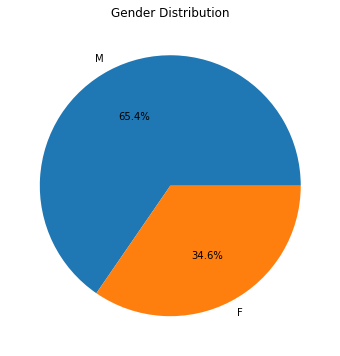

In [171]:
plt.figure(figsize=(6,6))
size = [921,487] # 数据
label=['M','F']
plt.pie(size,labels=label,autopct='%.1f%%')
plt.title('Gender Distribution')

# 身份/职业

In [175]:
tweet_unique['u_desc']

0       Mainly news I find interesting, pics, and opin...
1       "Watson is a brilliant polemicist." The Specta...
2       Anchor of @ReliableSources and @CNN's chief me...
3       Former Sr Fellow @CFR_org. Recipient of Pulitz...
4       President, Judicial Watch. (These are my perso...
                              ...                        
3348    U.S. Representative serving Tennessee’s Sixth ...
3352    National President NSUI | Former State Preside...
3353                         Anchor/Reporter @ ABC7 News 
3357    Comms @RepFischbach | Formerly @TeamTrump, @MN...
3359                               Stand with Hongkong,\n
Name: u_desc, Length: 1410, dtype: object

In [176]:
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # images
import numpy as np #numpy
import seaborn as sns
import tensorflow.compat.v2 as tf #use tensorflow v2 as a main 
import tensorflow.keras as keras # required for high level applications
from sklearn.model_selection import train_test_split # split for validation sets
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize # normalization of the matrix
import scipy
import pandas as pd
import unicodedata, re, string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import itertools

In [177]:
def remove_users_http(word):
    """Remove non-ASCII characters from list of tokenized words"""
    word = re.sub(r'http\S+', '', word)
    word = re.sub(r'@\w+', '', word)
    word = re.sub(r'#\w+', '', word)
    return word

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

def form_sentence(tweet):
    tweet = remove_users_http(tweet)
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

In [188]:
desc=''
for i in tweet_unique['u_desc']:
    desc=desc+" "+str(i)
desc
clean_desc0=form_sentence(desc)
clean_desc=normalize(clean_desc0)
clean_desc

['mainly',
 'news',
 'find',
 'interesting',
 'pics',
 'opinions',
 'honored',
 'represent',
 'great',
 'state',
 'texas',
 'us',
 'senate',
 'rts',
 'endorsements',
 'watson',
 'brilliant',
 'polemicist',
 'spectator',
 'popular',
 'cutting',
 'edge',
 'political',
 'commentator',
 'jewish',
 'voice',
 'telegram',
 'anchor',
 'chief',
 'media',
 'correspondent',
 'book',
 'hoax',
 'untold',
 'story',
 'trump',
 'fox',
 'news',
 'aug',
 'email',
 'bsteltercom',
 'former',
 'sr',
 'fellow',
 'recipient',
 'pulitzer',
 'prize',
 'polk',
 'xs',
 'peabody',
 'awards',
 'author',
 'iheard',
 'thesirensscream',
 'thecomingplague',
 'ebola',
 'betrayaloftrust',
 'president',
 'judicial',
 'watch',
 'personal',
 'views',
 'new',
 'book',
 'republic',
 'assault',
 'congressman',
 'politics',
 'karnataka',
 'patriot',
 'former',
 'karnataka',
 'congress',
 'social',
 'media',
 'head',
 'national',
 'campaign',
 'incharge',
 'youth',
 'congress',
 'roving',
 'journalist',
 'friend',
 'dogs',
 'mt

In [189]:
dist = nltk.FreqDist(clean_desc)
dist.most_common(50)

[('author', 144),
 ('news', 116),
 ('former', 102),
 ('us', 76),
 ('host', 74),
 ('political', 70),
 ('editor', 64),
 ('official', 63),
 ('correspondent', 61),
 ('journalist', 60),
 ('account', 60),
 ('national', 59),
 ('husband', 58),
 ('house', 54),
 ('member', 54),
 ('president', 53),
 ('views', 53),
 ('writer', 53),
 ('father', 50),
 ('twitter', 49),
 ('new', 47),
 ('politics', 47),
 ('columnist', 45),
 ('nan', 45),
 ('founder', 44),
 ('analyst', 44),
 ('world', 44),
 ('reporter', 43),
 ('senior', 41),
 ('white', 41),
 ('proud', 41),
 ('fellow', 40),
 ('media', 39),
 ('activist', 39),
 ('director', 39),
 ('tweets', 39),
 ('washington', 37),
 ('chief', 35),
 ('follow', 34),
 ('conservative', 34),
 ('china', 33),
 ('podcast', 33),
 ('contributor', 32),
 ('state', 31),
 ('personal', 31),
 ('senator', 31),
 ('india', 31),
 ('district', 31),
 ('opinions', 30),
 ('policy', 30)]

In [190]:
nouns=[]
for word,pos in nltk.pos_tag(clean_desc):
         if (pos == 'NN' or pos == 'NNP'):
             nouns.append(word)
nouns_count = nltk.FreqDist(nouns)
nouns_count.most_common(50)

[('author', 132),
 ('news', 116),
 ('editor', 64),
 ('host', 61),
 ('house', 54),
 ('member', 54),
 ('president', 53),
 ('correspondent', 52),
 ('journalist', 52),
 ('writer', 51),
 ('account', 48),
 ('husband', 48),
 ('founder', 44),
 ('analyst', 44),
 ('world', 44),
 ('twitter', 42),
 ('reporter', 40),
 ('director', 39),
 ('father', 36),
 ('columnist', 34),
 ('contributor', 32),
 ('state', 31),
 ('district', 31),
 ('policy', 30),
 ('minister', 30),
 ('business', 28),
 ('washington', 27),
 ('lawyer', 26),
 ('life', 25),
 ('security', 24),
 ('wife', 24),
 ('fan', 24),
 ('health', 23),
 ('activist', 23),
 ('book', 22),
 ('tv', 22),
 ('post', 22),
 ('secretary', 21),
 ('science', 21),
 ('congress', 20),
 ('producer', 20),
 ('time', 20),
 ('anchor', 19),
 ('freedom', 19),
 ('mom', 19),
 ('official', 19),
 ('law', 19),
 ('speaker', 18),
 ('alum', 18),
 ('veteran', 18)]

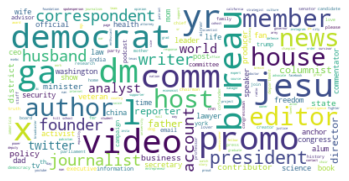

In [191]:
from wordcloud import WordCloud
final_text ='/'.join(nouns_count)
wordcloud = WordCloud(background_color="white", max_font_size=40).generate(final_text)
# 步骤4-1：创建一个图表画布
plt.figure()
# 步骤4-2：设置图片
plt.imshow(wordcloud, interpolation="bilinear")
# 步骤4-3：取消图表x、y轴
plt.axis("off")
# 显示图片
plt.show()